## Inteligență Artificială 2016 - Laboratorul 1 : Căutări
 - Tudor Berariu <tudor.berariu@gmail.com>
 - Andrei Olaru <cs@andreiolaru.ro>

### Scopul laboratorului

De foarte multe ori problemele care sunt legate de domeniul inteligenței artificiale sunt abstractizate ca o **căutare în spațiul stărilor** problemei. Laboratorul de astăzi își propune să recapituleze câteva noțiuni legate de limbajul de programare **Python** și să prezinte un algoritm de căutare informată: **A\***.

### Problema

În cadrul acestui laborator vom rezolva problema găsirii unui drum între două poziții pe o hartă bidimensională. Harta va avea și obstacole peste care nu se poate trece.

Problemele de căutare sunt în general abstractizate cu grafuri. Harta bidimensională poate fi văzută ca un graf neorientat în care fiecare nod corespunde unei celule de pe hartă, iar o muchie conectează nodurile corespunzătoare  unor celule adiacente.

#### Pastila de Python

In [1]:
# Instanțierea unei variabile
a = 10
print(a)  # ==> a
a += 3
print(a) # ==> a

10
13


In [2]:
# Liste
l1 = [1, 2, 3, 4]  # O listă definită explicit
l2 = [x*x for x in range(4)]  # List comprehension
l3 = [(chr(i), j) for i in range(ord('a'), ord('c')+1) for j in range(1,3)]
l4 = l1 + l2 + l3  # Concatenarea listelor; Observație: listele nu sunt tipate

print(l4)  # Se afișează lista l4
print(l4[3:-3])  # Se afișează lista l4 fără primele 3 și ultimele 3 elemente

[1, 2, 3, 4, 0, 1, 4, 9, ('a', 1), ('a', 2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)]
[4, 0, 1, 4, 9, ('a', 1), ('a', 2), ('b', 1)]


#### Labirintul

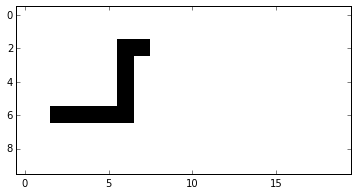

In [3]:
# Vom reprezenta labirintul printr-un tablou bidimensional (o listă de liste)
# celulele libere vor avea valoarea 0, iar pereții valoarea 1

height = 10
width = 20

# Construim labirintul ca o listă de liste
labyrinth = [[0 for c in range(width)] for r in range(height)]

# Așezăm câteva obstacole pe hartă
for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys', interpolation='nearest');

In [4]:
# Punctul de plecare și punctul destinație vor fi reprezentate prin tupluri
start = (5, 5)
final = (8, 8)

# Funcții lambda, funcționale, lucruri frumoase
is_final = lambda position: position == final

# Map
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

In [5]:
# Filter
list(filter(lambda x: x % 3 == 2, range(20)))  # ==> [2, 5, 8, 11, 14, 17]

[2, 5, 8, 11, 14, 17]

In [6]:
from functools import reduce

# Reduce
reduce(lambda x, y: [y] + x, [], [1,2,3])  # ==> [1, 2, 3]

[1, 2, 3]

### Algoritmul A*

Pentru a implementa algoritmul **A\*** vom scrie întâi o funcție care întoarce lista tuturor pozițiilor vecine unei poziții date.

In [7]:
# Scrieți o funcție care verifică dacă un tuplu dat reprezintă
# coordonatele unei poziții libere de pe hartă (coordonatele nu depășesc limitele hărții
# și acolo nu se găsește un obstacol)

def is_good(pos):
    # TODO
    return False

list(map(is_good, [(-1,2), (height,3), (width,4), (5,5), (6,6)])) # False, False, False, True, False

[False, False, False, False, False]

In [8]:
# Scrieți o funcție care întoarce celulele vecine poziției date (doar cele libere)
# Folosiți funcționala filter și funcția is_good scrisă anterior

def get_neighbours(pos):
    (r, c) = pos # Așa se poate desface o poziție în componentele sale
    # TODO
    return []

[get_neighbours(p) for p in [(0,9), (5,5)]] # ==> [[(1,9), (0,8), (0, 10)], [(4,5), (5,4)]] - nu neaparat în ordinea asta

[[], []]

#### Funcții euristice

Implementați două funcții euristice pe care să le folosiți în algoritmul **A\***:
 - distanța euclidiană
 - distanța Manhattan

In [9]:
from math import sqrt

def euclidean_distance(a, b):
    # TODO
    return 0

euclidean_distance((2,3), (4, 7))   # ==> 4.4721359

0

In [10]:
def manhattan_distance(a, b):
    # TODO
    return 0

manhattan_distance((2,3), (4,0))  # ==> 5

0

#### Cozi de priorități

Pentru coada de priorități necesară algoritmului **A\*** vom folosi heap-ul din Python [[1]](https://docs.python.org/2/library/heapq.html).

In [11]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, (2, 'A'))
heappush(priority_queue, (1, 'B'))
heappush(priority_queue, (1.5, 'C'))

print(heappop(priority_queue))  # ==> (1, 'B')
print(heappop(priority_queue))  # ==> (1.5, 'C')
print(heappop(priority_queue))  # ==> (2, 'A')

(1, 'B')
(1.5, 'C')
(2, 'A')


#### Dicționare

Algoritmul **A\*** memorează în timpul rulării informații despre pozițiile descoperite pe parcurs. Pentru a salva și recupera aceste informații în O(1) vom folosi o tabelă de dispersie, un dicționar în Python.

In [12]:
# Dicționare
d = {}
d['doi'] = 2
d['trei'] = 3

print(d['doi']) # ==> 2

# Funcția get
print(d.get('trei'))  # ==> 3
print(d.get('patru', 'Nu am găsit!'))  # ==> Nu am găsit!

for (key, value) in d.items():
    print(key, " -> ", value)

2
3
Nu am găsit!
('trei', ' -> ', 3)
('doi', ' -> ', 2)


#### Algoritmul A\*

Scrieți o funcție ce implementează algoritmul **A\***. Funcția va primi 3 argumente:
 - poziția de start
 - poziția finală
 - funcția euristică folosită
 
Frontiera va fi o coadă de priorități ce va conține nodurile descoperite:
 - prioritatea va fi dată de funcția f (cost real din nodul de start + valoare estimată până la nodul final)

Pentru informațiile ce trebuie memorate pentru fiecare nod descoperit se va folosi un dicționar

    d[node] = (parent, cost)
    
în care se vor reține părintele nodului și costul cu care a fost descoperit.

In [13]:
def astar(start, end, h):
    # Frontiera, ca listă (heap) de tupluri (cost-total-estimat, nod)
    frontier = []
    heappush(frontier, (0 + h(start, end), start))
    # Nodurile descoperite ca dicționar nod -> (părinte, cost-până-la-nod)
    discovered = {start: (None, 0)}
    while frontier:
        # TODO
        break # de șters de aici
    
    cost_map = [[discovered[(r,c)][1] if (r,c) in discovered else 0 for c in range(width)]for r in range(height)]
    pyplot.imshow(cost_map , cmap='Greys', interpolation='nearest');
    
    # Refacem drumul
    path = []
    return path # drumul, ca listă de poziții

[]

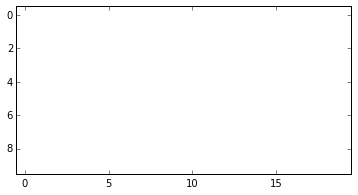

In [14]:
astar(start, final, euclidean_distance)